<a href="https://colab.research.google.com/github/Nami298/Exercise/blob/main/traffic_light.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
uploaded = files.upload()


Saving archive(1).zip to archive(1).zip


In [13]:
import zipfile

with zipfile.ZipFile("archive(1).zip", 'r') as zip_ref:
    zip_ref.extractall("carla_dataset")


In [19]:
import os
import random
import cv2
from matplotlib import pyplot as plt
import zipfile
from google.colab import files


In [20]:
import os

base_path = "carla_dataset/traffic_light_data/train"

print("Exist?", os.path.exists(base_path))
print("Folders inside 'train':", os.listdir(base_path) if os.path.exists(base_path) else "Path not found")


Exist? True
Folders inside 'train': ['yellow', 'back', 'red', 'green']


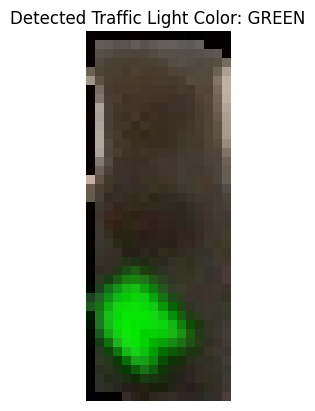

In [21]:
import random
import cv2
from matplotlib import pyplot as plt
import os

dataset_path = "carla_dataset/traffic_light_data/train"
classes = ['red', 'yellow', 'green']

# انتخاب رندوم کلاس
chosen_class = random.choice(classes)

# لیست فایل‌های داخل پوشه کلاس انتخاب شده
class_path = os.path.join(dataset_path, chosen_class)
image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# انتخاب رندوم یک تصویر
chosen_image = random.choice(image_files)
image_path = os.path.join(class_path, chosen_image)

# خواندن تصویر با OpenCV (BGR)
image = cv2.imread(image_path)

# تبدیل BGR به RGB برای نمایش با matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# نمایش تصویر با عنوان رنگ تشخیص داده شده
plt.imshow(image_rgb)
plt.title(f"Detected Traffic Light Color: {chosen_class.upper()}")
plt.axis('off')
plt.show()


In [24]:
def detect_traffic_light_color(image):
    """
    تشخیص رنگ چراغ راهنمایی بر اساس تصویر ورودی (RGB)
    خروجی: یکی از 'red' یا 'yellow' یا 'green'
    """
    import numpy as np
    import cv2

    # تبدیل تصویر از RGB به HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # بازه‌های رنگی HSV برای قرمز، زرد و سبز
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([179, 255, 255])

    lower_yellow = np.array([15, 100, 100])
    upper_yellow = np.array([35, 255, 255])

    lower_green = np.array([40, 50, 50])
    upper_green = np.array([90, 255, 255])

    # ماسک‌های رنگی بسازیم
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)

    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    # تعداد پیکسل‌های هر رنگ
    red_count = cv2.countNonZero(mask_red)
    yellow_count = cv2.countNonZero(mask_yellow)
    green_count = cv2.countNonZero(mask_green)

    counts = {'red': red_count, 'yellow': yellow_count, 'green': green_count}
    detected_color = max(counts, key=counts.get)  # رنگ با بیشترین پیکسل

    return detected_color


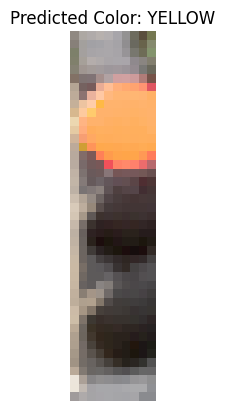

In [32]:
# مسیر دیتاست و کلاس‌ها
dataset_path = "carla_dataset/traffic_light_data/train"
classes = ['red', 'yellow', 'green']

# انتخاب رندوم کلاس
chosen_class = random.choice(classes)

# لیست فایل‌های تصویر کلاس انتخاب شده
class_path = os.path.join(dataset_path, chosen_class)
image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# انتخاب رندوم یک تصویر
chosen_image = random.choice(image_files)
image_path = os.path.join(class_path, chosen_image)

# خواندن تصویر با OpenCV (BGR)
image = cv2.imread(image_path)

# تبدیل BGR به RGB برای تابع تشخیص و نمایش
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# تشخیص رنگ چراغ
detected_color = detect_traffic_light_color(image_rgb)

# نمایش تصویر با عنوان رنگ تشخیص داده شده
plt.imshow(image_rgb)
plt.title(f"Predicted Color: {detected_color.upper()}")
plt.axis('off')
plt.show()
